<div align="right">
  Christopher Lüken-Winkels, Lukas Blecher
</div>
# Exercise 3
## 3 Data Generation with QDA

In [1]:
#import standard libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import model_selection
#load digits
digits = load_digits ()
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

In [2]:
def fit_qda(training_features, training_labels):
    #list of features:
    features=np.nonzero(np.bincount(training_labels))[0]
    mu, covmat, p = [], [], []
    for i in range(len(features)):
        #only instances of the current class
        X = training_features[training_labels == features[i]]
        #compute mean
        mu.append(np.mean(X, axis=0))
        #compute the covariance using the numpy function
        covmat.append(np.cov(X.T))
        #add prior
        p.append(len(X)/len(training_features))   
    return np.array(mu), np.array(covmat), np.array(p)

In [3]:
#filter out all 0's and 5's and train with fit_qda
subFeatures= data[(target==0)|(target==5)]
subLabels = target[(target==0)|(target==5)]
mu, covmat, p = fit_qda(subFeatures, subLabels)

In [4]:
#generate 8 new instances of 0's and 5's
newZero=np.random.multivariate_normal(mu[0],covmat[0],size=8)
newFive=np.random.multivariate_normal(mu[1],covmat[1],size=8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


In [12]:
print(np.all(np.linalg.eigvals(covmat[0]) >= 0), np.all(np.linalg.eigvals(covmat[1]) >= 0)) 
#covariance matrix is positive semidefinite

True True


In [23]:
#a function to plot the new instances easily
def plotInstances(newSet):  
    #plot all new instances
    fig = plt.figure(figsize = (15,3))
    plt.gray()
    for i in range(len(newSet)):
        plt.subplot(1,len(newSet),i+1)
        plt.axis('off')
        plt.imshow(newSet[i].reshape((8,8)), interpolation = "nearest")
        plt.title('%i'%(i+1))
    #fig.tight_layout()
    return fig
    

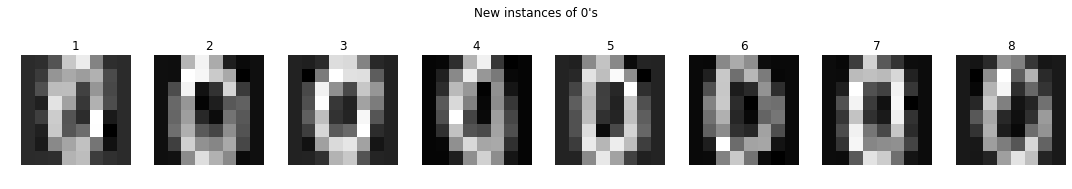

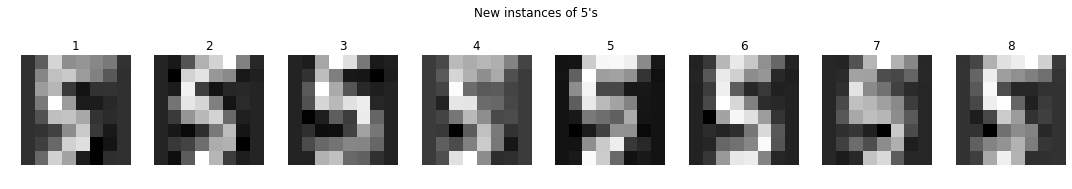

In [34]:
#display all the new instances
sets=[newZero,newFive]
for i in range(2):
    fig=plotInstances(sets[i])
    fig.suptitle("New instances of %i's"%[0,5][i])
    fig.tight_layout()

The generated images can be easily identified as memeber of their class. Some are not very clear e.g. the fives 4 and 7. Notable is that the intensity varies within a continuous line.